In [1]:
import time
a = time.time()

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)
# the reason code didn't work earlier was because we used version = 1 instead of as_frame = False
mnist.keys()

/Users/yasserali/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


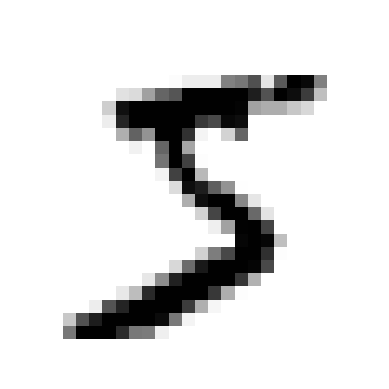

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = X[0]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [4]:
import numpy as np
y = y.astype(np.uint8)

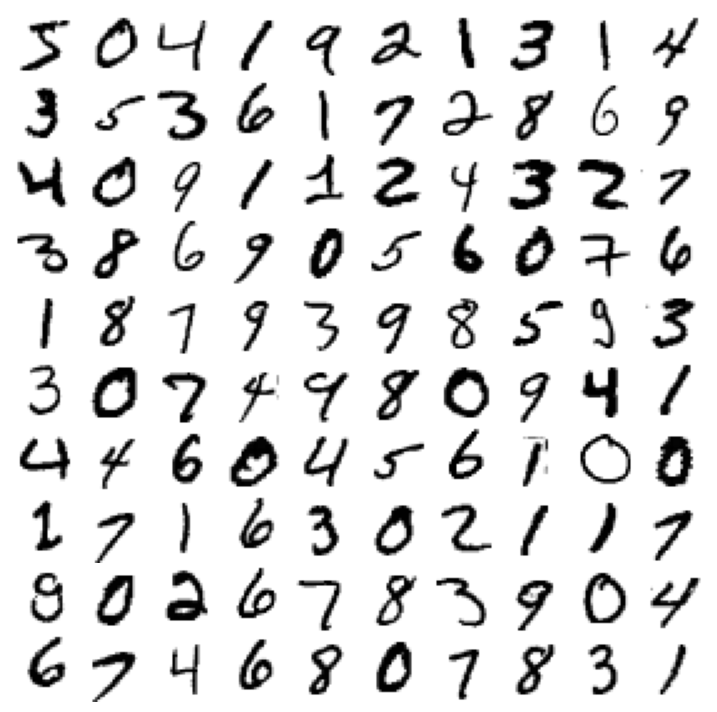

In [5]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.figure(figsize = (9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

/Users/yasserali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

checkpoint = ModelCheckpoint('best_model.keras',
                             monitor = 'val_loss',
                             save_best_only = True,
                             mode = 'min',
                             verbose = 1)

early_stopping = EarlyStopping(patience = 5, restore_best_weights = True)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels,
          validation_split = 0.2, 
          epochs = 15, 
          batch_size = 64, 
          verbose = 2,
          callbacks = [checkpoint])

Epoch 1/15

Epoch 1: val_loss improved from inf to 0.07138, saving model to best_model.keras
750/750 - 9s - 12ms/step - accuracy: 0.9354 - loss: 0.2163 - val_accuracy: 0.9792 - val_loss: 0.0714
Epoch 2/15

Epoch 2: val_loss improved from 0.07138 to 0.05546, saving model to best_model.keras
750/750 - 8s - 10ms/step - accuracy: 0.9811 - loss: 0.0604 - val_accuracy: 0.9834 - val_loss: 0.0555
Epoch 3/15

Epoch 3: val_loss improved from 0.05546 to 0.05072, saving model to best_model.keras
750/750 - 8s - 11ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9852 - val_loss: 0.0507
Epoch 4/15

Epoch 4: val_loss improved from 0.05072 to 0.04267, saving model to best_model.keras
750/750 - 8s - 11ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 5/15

Epoch 5: val_loss improved from 0.04267 to 0.04121, saving model to best_model.keras
750/750 - 8s - 11ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0.9885 - val_loss: 0.0412
Epoch 6/15

Ep

In [4]:
model.load_weights('best_model.keras')
yhat = model.predict(test_images)
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0405


[0.030741650611162186, 0.9908000230789185]

In [5]:
from keras import layers
from keras import models

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation = 'relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(10, activation = 'softmax'))

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras',
                             monitor = 'val_loss',
                             save_best_only = True,
                             mode = 'min',
                             verbose = 1)

early_stopping = EarlyStopping(patience = 5, restore_best_weights = True)

model2.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model2.fit(train_images, train_labels,
          validation_split = 0.2, 
          epochs = 15, 
          batch_size = 64, 
          verbose = 2,
          callbacks = [checkpoint])

model2.load_weights('best_model.keras')
yhat = model2.predict(test_images)
model.evaluate(test_images, test_labels)

Epoch 1/15

Epoch 1: val_loss improved from inf to 0.08083, saving model to best_model.keras
750/750 - 9s - 12ms/step - accuracy: 0.8591 - loss: 0.4461 - val_accuracy: 0.9768 - val_loss: 0.0808
Epoch 2/15

Epoch 2: val_loss improved from 0.08083 to 0.05799, saving model to best_model.keras
750/750 - 9s - 11ms/step - accuracy: 0.9539 - loss: 0.1524 - val_accuracy: 0.9830 - val_loss: 0.0580
Epoch 3/15

Epoch 3: val_loss improved from 0.05799 to 0.04905, saving model to best_model.keras
750/750 - 9s - 12ms/step - accuracy: 0.9666 - loss: 0.1130 - val_accuracy: 0.9862 - val_loss: 0.0490
Epoch 4/15

Epoch 4: val_loss improved from 0.04905 to 0.04899, saving model to best_model.keras
750/750 - 9s - 12ms/step - accuracy: 0.9717 - loss: 0.0922 - val_accuracy: 0.9870 - val_loss: 0.0490
Epoch 5/15

Epoch 5: val_loss improved from 0.04899 to 0.04680, saving model to best_model.keras
750/750 - 9s - 12ms/step - accuracy: 0.9755 - loss: 0.0813 - val_accuracy: 0.9887 - val_loss: 0.0468
Epoch 6/15

Ep

[0.030741650611162186, 0.9908000230789185]

In [7]:
yhat = model2.predict(test_images)
model2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0425


[0.03108309395611286, 0.9926000237464905]

In [8]:
b = time.time()
print(f'length of program: {b - a} seconds')

length of program: 267.1339409351349 seconds
